# mESC-Seurat

Current working directory: /root/Cycle/Github


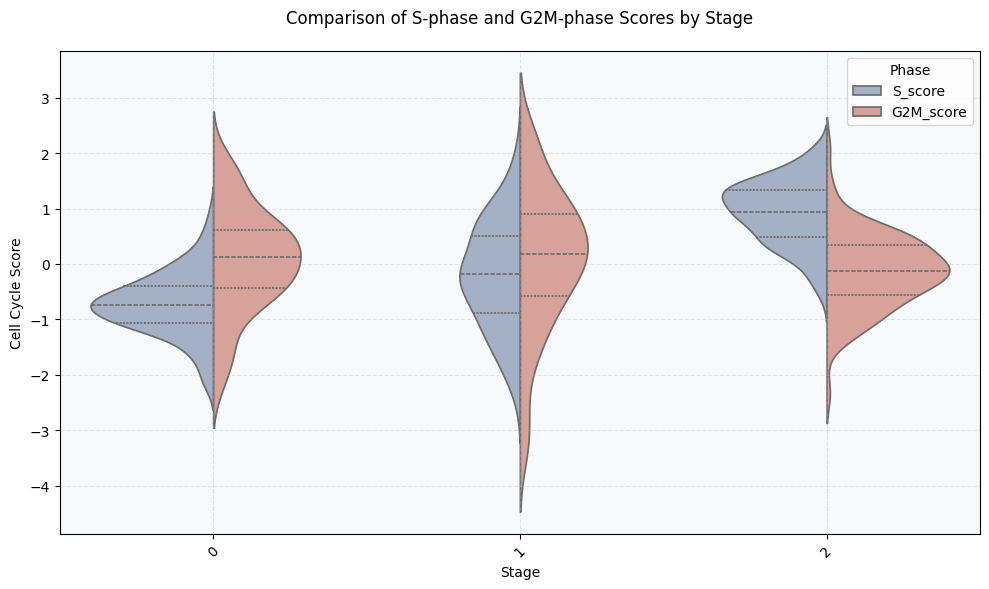

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/mESC.h5ad')

# ==============================
# Preprocessing
# ==============================
sc.pp.normalize_total(adata1, target_sum=1e4)   # Normalize counts per cell
sc.pp.log1p(adata1)                             # Log-transform the data
sc.pp.scale(adata1, max_value=10)               # Scale each gene to unit variance, clip values

# ==============================
# Prepare cell cycle gene lists
# ==============================
s_genes = pd.read_csv('./Dataset/Seurat_g2m_genes.csv', header=None)
g2m_genes = pd.read_csv('./Dataset/Seurat_s_genes.csv', header=None)

# Ensure genes exist in dataset
s_genes_list = [gene for gene in s_genes[0].tolist() if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes[0].tolist() if gene in adata1.var_names]

# ==============================
# Map stage to cell cycle phase
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')
stage_mapping = {'0': 'G1', '1': 'S', '2': 'G2M'}
adata1.obs['phase'] = adata1.obs['stage'].map(stage_mapping)

# ==============================
# Compute cell cycle scores
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale S and G2M scores
# ==============================
cols_to_scale = ['S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values back into adata
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Plot violin comparison
# ==============================
plt.figure(figsize=(10, 6))

# Prepare data for plotting
plot_data = adata1.obs[['stage', 'S_score', 'G2M_score']].melt(
    id_vars='stage', var_name='Phase', value_name='Score'
)

# Define color palette
palette = {'S_score': '#9FAFCB', 'G2M_score': '#E19A90'}

# Draw violin plot
fig = sns.violinplot(
    data=plot_data, x='stage', y='Score', hue='Phase',
    split=True, order=[0, 1, 2],
    inner='quartile', palette=palette
)

plt.title('Comparison of S-phase and G2M-phase Scores by Stage', pad=20)
plt.xlabel('Stage')
plt.ylabel('Cell Cycle Score')
plt.legend(title='Phase', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Set background color and grid
plt.gca().set_facecolor('#F8F9FA')  
plt.grid(True, linestyle='--', alpha=0.3, color='#B9B1C5')

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'mESC_Stage_Gene_Marker.png'),
            bbox_inches='tight', dpi=300)
plt.show()


# hESC-Seurat

Current working directory: /root/Cycle/Github


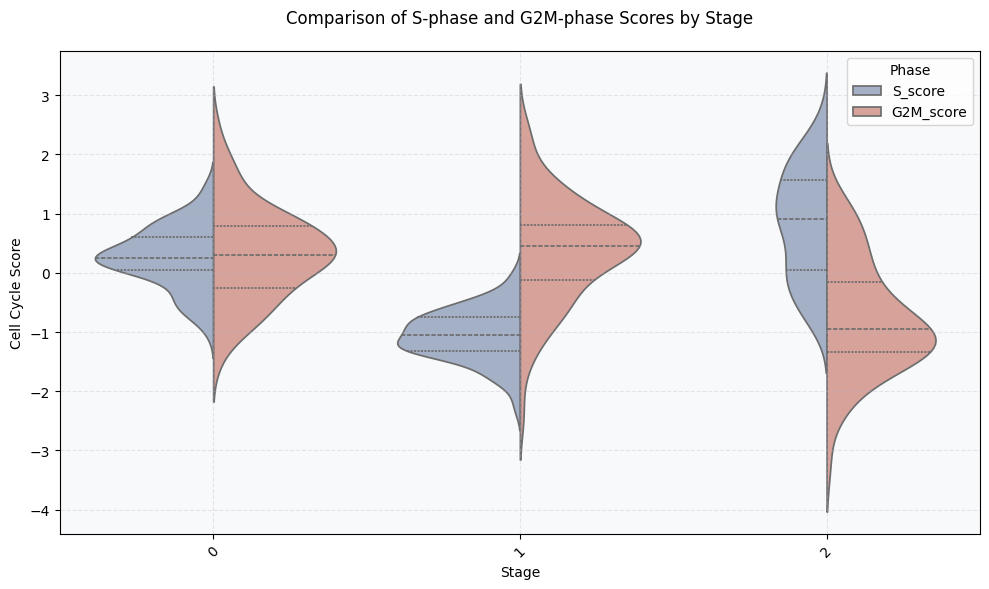

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/hESC.h5ad')

# ==============================
# Preprocessing
# ==============================
sc.pp.normalize_total(adata1, target_sum=1e4)   # Normalize counts per cell
sc.pp.log1p(adata1)                             # Log-transform the data
sc.pp.scale(adata1, max_value=10)               # Scale each gene to unit variance, clip values

# ==============================
# Prepare cell cycle gene lists
# ==============================
s_genes = pd.read_csv('./Dataset/Seurat_g2m_genes.csv', header=None)
g2m_genes = pd.read_csv('./Dataset/Seurat_s_genes.csv', header=None)

# Ensure genes exist in dataset
s_genes_list = [gene for gene in s_genes[0].tolist() if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes[0].tolist() if gene in adata1.var_names]

# ==============================
# Map stage to cell cycle phase
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')
stage_mapping = {'0': 'G1', '1': 'S', '2': 'G2M'}
adata1.obs['phase'] = adata1.obs['stage'].map(stage_mapping)

# ==============================
# Compute cell cycle scores
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale S and G2M scores
# ==============================
cols_to_scale = ['S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values back into adata
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Plot violin comparison
# ==============================
plt.figure(figsize=(10, 6))

# Prepare data for plotting
plot_data = adata1.obs[['stage', 'S_score', 'G2M_score']].melt(
    id_vars='stage', var_name='Phase', value_name='Score'
)

# Define color palette
palette = {'S_score': '#9FAFCB', 'G2M_score': '#E19A90'}

# Draw violin plot
fig = sns.violinplot(
    data=plot_data, x='stage', y='Score', hue='Phase',
    split=True, order=[0, 1, 2],
    inner='quartile', palette=palette
)

plt.title('Comparison of S-phase and G2M-phase Scores by Stage', pad=20)
plt.xlabel('Stage')
plt.ylabel('Cell Cycle Score')
plt.legend(title='Phase', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Set background color and grid
plt.gca().set_facecolor('#F8F9FA')  
plt.grid(True, linestyle='--', alpha=0.3, color='#B9B1C5')

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'hESC_Stage_Gene_Marker.png'),
            bbox_inches='tight', dpi=300)
plt.show()


# hU2OS-Seurat

Current working directory: /root/Cycle/Github


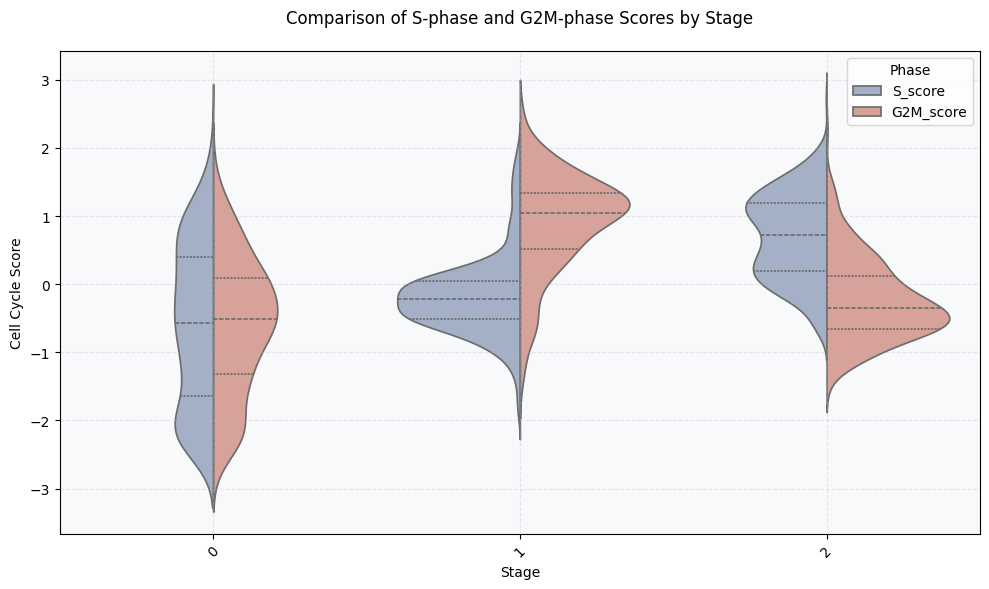

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/hU2OS.h5ad')

# ==============================
# Preprocessing
# ==============================
sc.pp.normalize_total(adata1, target_sum=1e4)   # Normalize counts per cell
sc.pp.log1p(adata1)                             # Log-transform the data
sc.pp.scale(adata1, max_value=10)               # Scale each gene to unit variance, clip values

# ==============================
# Prepare cell cycle gene lists
# ==============================
s_genes = pd.read_csv('./Dataset/Seurat_g2m_genes.csv', header=None)
g2m_genes = pd.read_csv('./Dataset/Seurat_s_genes.csv', header=None)

# Ensure genes exist in dataset
s_genes_list = [gene for gene in s_genes[0].tolist() if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes[0].tolist() if gene in adata1.var_names]

# ==============================
# Map stage to cell cycle phase
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')
stage_mapping = {'0': 'G1', '1': 'S', '2': 'G2M'}
adata1.obs['phase'] = adata1.obs['stage'].map(stage_mapping)

# ==============================
# Compute cell cycle scores
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale S and G2M scores
# ==============================
cols_to_scale = ['S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values back into adata
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Plot violin comparison
# ==============================
plt.figure(figsize=(10, 6))

# Prepare data for plotting
plot_data = adata1.obs[['stage', 'S_score', 'G2M_score']].melt(
    id_vars='stage', var_name='Phase', value_name='Score'
)

# Define color palette
palette = {'S_score': '#9FAFCB', 'G2M_score': '#E19A90'}

# Draw violin plot
fig = sns.violinplot(
    data=plot_data, x='stage', y='Score', hue='Phase',
    split=True, order=[0, 1, 2],
    inner='quartile', palette=palette
)

plt.title('Comparison of S-phase and G2M-phase Scores by Stage', pad=20)
plt.xlabel('Stage')
plt.ylabel('Cell Cycle Score')
plt.legend(title='Phase', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Set background color and grid
plt.gca().set_facecolor('#F8F9FA')  
plt.grid(True, linestyle='--', alpha=0.3, color='#B9B1C5')

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'hU2OS_Stage_Gene_Marker.png'),
            bbox_inches='tight', dpi=300)
plt.show()


# mESCQ-Seurat

Current working directory: /root/Cycle/Github


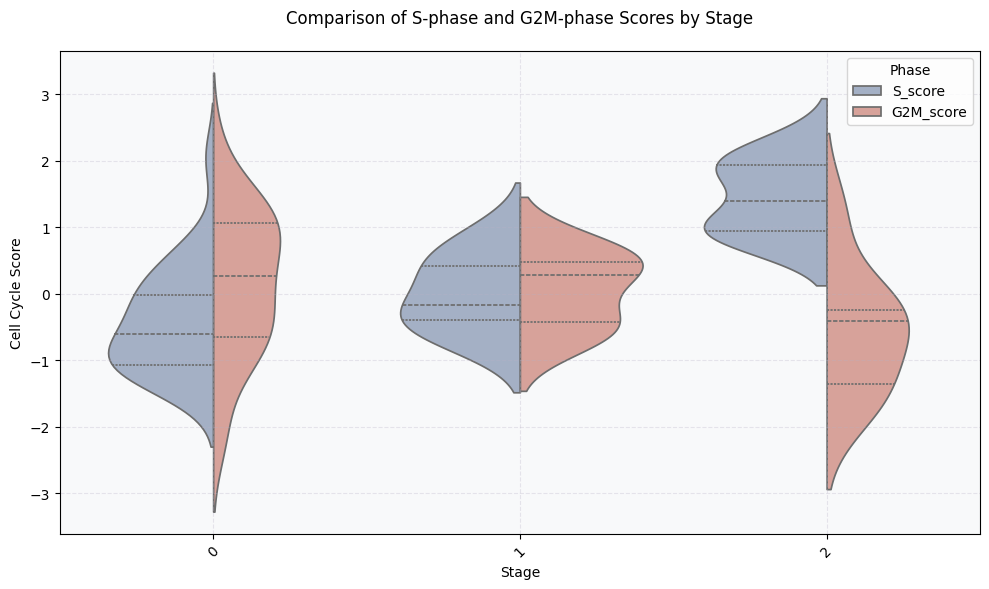

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/mESCQ.h5ad')

# ==============================
# Preprocessing
# ==============================
sc.pp.normalize_total(adata1, target_sum=1e4)   # Normalize counts per cell
sc.pp.log1p(adata1)                             # Log-transform the data
sc.pp.scale(adata1, max_value=10)               # Scale each gene to unit variance, clip values

# ==============================
# Prepare cell cycle gene lists
# ==============================
s_genes = pd.read_csv('./Dataset/Seurat_g2m_genes.csv', header=None)
g2m_genes = pd.read_csv('./Dataset/Seurat_s_genes.csv', header=None)

# Ensure genes exist in dataset
s_genes_list = [gene for gene in s_genes[0].tolist() if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes[0].tolist() if gene in adata1.var_names]

# ==============================
# Map stage to cell cycle phase
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')
stage_mapping = {'0': 'G1', '1': 'S', '2': 'G2M'}
adata1.obs['phase'] = adata1.obs['stage'].map(stage_mapping)

# ==============================
# Compute cell cycle scores
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale S and G2M scores
# ==============================
cols_to_scale = ['S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values back into adata
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Plot violin comparison
# ==============================
plt.figure(figsize=(10, 6))

# Prepare data for plotting
plot_data = adata1.obs[['stage', 'S_score', 'G2M_score']].melt(
    id_vars='stage', var_name='Phase', value_name='Score'
)

# Define color palette
palette = {'S_score': '#9FAFCB', 'G2M_score': '#E19A90'}

# Draw violin plot
fig = sns.violinplot(
    data=plot_data, x='stage', y='Score', hue='Phase',
    split=True, order=[0, 1, 2],
    inner='quartile', palette=palette
)

plt.title('Comparison of S-phase and G2M-phase Scores by Stage', pad=20)
plt.xlabel('Stage')
plt.ylabel('Cell Cycle Score')
plt.legend(title='Phase', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Set background color and grid
plt.gca().set_facecolor('#F8F9FA')  
plt.grid(True, linestyle='--', alpha=0.3, color='#B9B1C5')

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'mESCQ_Stage_Gene_Marker.png'),
            bbox_inches='tight', dpi=300)
plt.show()


# mESC-Cyclebase

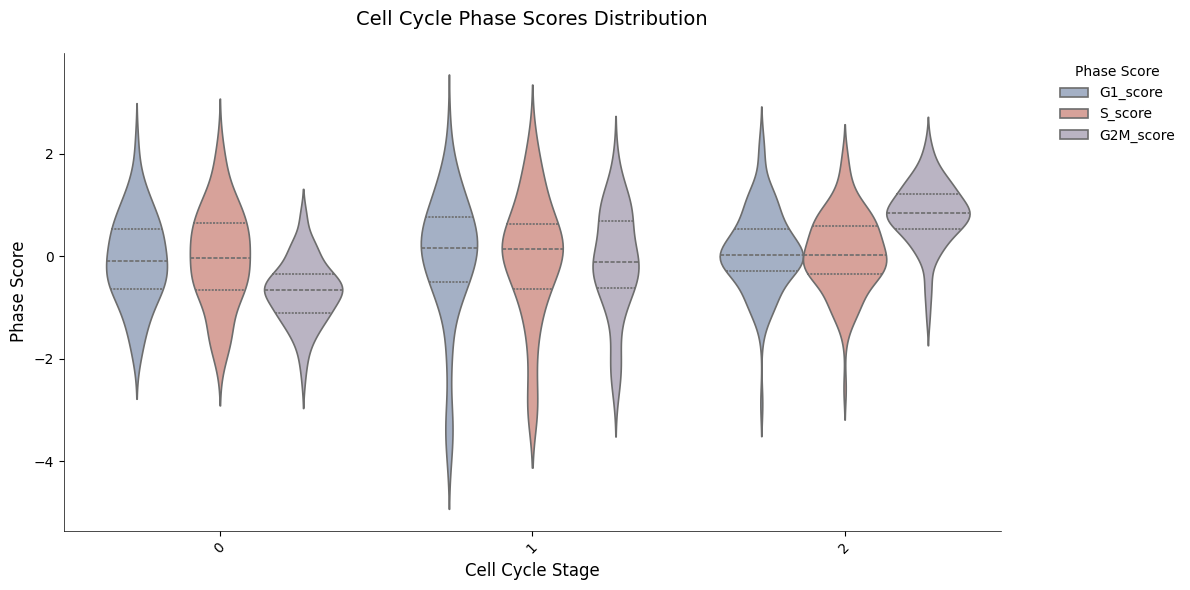

In [5]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ==============================
# Load CycleBase gene list
# ==============================
cyclebase = pd.read_table('./Dataset/CyclebaseGeneList.txt')

# Extract genes by peak time
g1_genes = cyclebase[cyclebase['Peaktime'].str.contains('G1')].Genename.values
g2_genes = cyclebase[cyclebase['Peaktime'].str.contains('G2')].Genename.values
m_genes  = cyclebase[cyclebase['Peaktime'].str.contains('M')].Genename.values
s_genes  = cyclebase[cyclebase['Peaktime'].str.contains('S')].Genename.values

# Combine and deduplicate
g2m_genes = np.unique(np.concatenate([g2_genes, m_genes]))
g1_genes  = np.unique(g1_genes)
m_genes   = np.unique(m_genes)

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/mESC.h5ad')

# Preprocessing
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
sc.pp.scale(adata1, max_value=10)

# Ensure genes exist in dataset
s_genes_list   = [gene for gene in s_genes if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes if gene in adata1.var_names]
g1_genes_list  = [gene for gene in g1_genes if gene in adata1.var_names]

# ==============================
# Convert stage to string
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')

# ==============================
# Compute cell cycle scores
# First pass: G1 vs G2M
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=g1_genes_list,
    g2m_genes=g2m_genes_list
)

# Store G1 score separately
adata1.obs['G1_score'] = adata1.obs['S_score']

# Second pass: S vs G2M
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale scores
# ==============================
cols_to_scale = ['G1_score', 'S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Prepare data for plotting
# ==============================
plot_data = adata1.obs[['phase', 'G1_score', 'S_score', 'G2M_score']].melt(
    id_vars='phase',
    var_name='Phase',
    value_name='Score'
)

# Define color palette
phase_colors = {
    'G1_score': '#9FAFCB',  # soft blue-gray
    'S_score':  '#E19A90',  # coral pink
    'G2M_score':'#B9B1C5'   # light purple
}

# ==============================
# Plot violin distribution
# ==============================
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=plot_data,
    x='phase',
    y='Score',
    hue='Phase',
    palette=phase_colors,
    order=['0', '1', '2'],
    split=False,
    inner='quartile',
    linewidth=1.2
)

# Beautify plot
plt.title('Cell Cycle Phase Scores Distribution', fontsize=14, pad=20, fontweight='medium')
plt.xlabel('Cell Cycle Stage', fontsize=12, fontweight='medium')
plt.ylabel('Phase Score', fontsize=12, fontweight='medium')

# Legend
plt.legend(title='Phase Score', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Axis style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.xticks(rotation=45)
plt.tight_layout()

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'mESC_Stage_Gene_Marker_Cyclebase.png'),
            bbox_inches='tight', dpi=300, transparent=True)
plt.show()


# hESC-Cyclebase

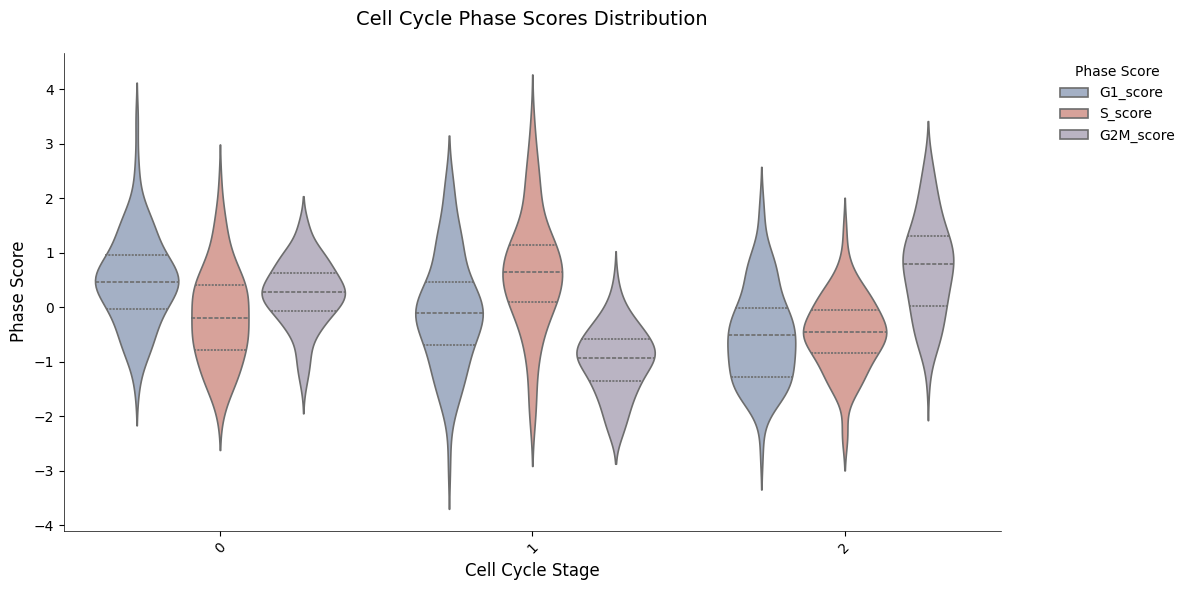

In [6]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ==============================
# Load CycleBase gene list
# ==============================
cyclebase = pd.read_table('./Dataset/CyclebaseGeneList.txt')

# Extract genes by peak time
g1_genes = cyclebase[cyclebase['Peaktime'].str.contains('G1')].Genename.values
g2_genes = cyclebase[cyclebase['Peaktime'].str.contains('G2')].Genename.values
m_genes  = cyclebase[cyclebase['Peaktime'].str.contains('M')].Genename.values
s_genes  = cyclebase[cyclebase['Peaktime'].str.contains('S')].Genename.values

# Combine and deduplicate
g2m_genes = np.unique(np.concatenate([g2_genes, m_genes]))
g1_genes  = np.unique(g1_genes)
m_genes   = np.unique(m_genes)

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/hESC.h5ad')

# Preprocessing
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
sc.pp.scale(adata1, max_value=10)

# Ensure genes exist in dataset
s_genes_list   = [gene for gene in s_genes if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes if gene in adata1.var_names]
g1_genes_list  = [gene for gene in g1_genes if gene in adata1.var_names]

# ==============================
# Convert stage to string
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')

# ==============================
# Compute cell cycle scores
# First pass: G1 vs G2M
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=g1_genes_list,
    g2m_genes=g2m_genes_list
)

# Store G1 score separately
adata1.obs['G1_score'] = adata1.obs['S_score']

# Second pass: S vs G2M
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale scores
# ==============================
cols_to_scale = ['G1_score', 'S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Prepare data for plotting
# ==============================
plot_data = adata1.obs[['phase', 'G1_score', 'S_score', 'G2M_score']].melt(
    id_vars='phase',
    var_name='Phase',
    value_name='Score'
)

# Define color palette
phase_colors = {
    'G1_score': '#9FAFCB',  # soft blue-gray
    'S_score':  '#E19A90',  # coral pink
    'G2M_score':'#B9B1C5'   # light purple
}

# ==============================
# Plot violin distribution
# ==============================
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=plot_data,
    x='phase',
    y='Score',
    hue='Phase',
    palette=phase_colors,
    order=['0', '1', '2'],
    split=False,
    inner='quartile',
    linewidth=1.2
)

# Beautify plot
plt.title('Cell Cycle Phase Scores Distribution', fontsize=14, pad=20, fontweight='medium')
plt.xlabel('Cell Cycle Stage', fontsize=12, fontweight='medium')
plt.ylabel('Phase Score', fontsize=12, fontweight='medium')

# Legend
plt.legend(title='Phase Score', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Axis style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.xticks(rotation=45)
plt.tight_layout()

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'hESC_Stage_Gene_Marker_Cyclebase.png'),
            bbox_inches='tight', dpi=300, transparent=True)
plt.show()


# hU2OS-Cyclebase

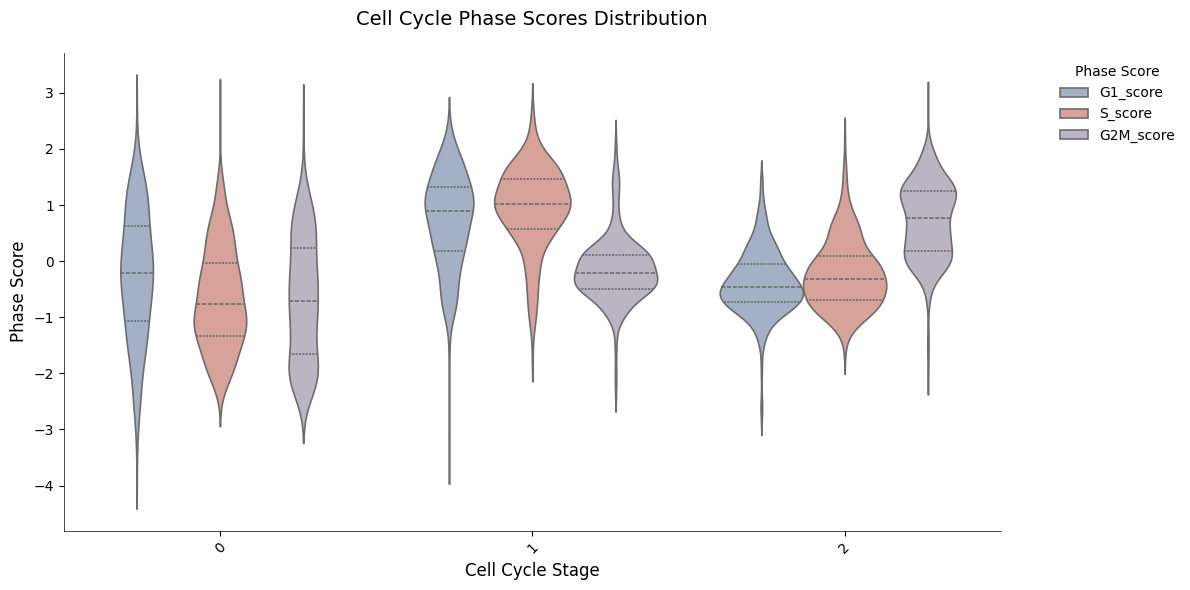

In [7]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ==============================
# Load CycleBase gene list
# ==============================
cyclebase = pd.read_table('./Dataset/CyclebaseGeneList.txt')

# Extract genes by peak time
g1_genes = cyclebase[cyclebase['Peaktime'].str.contains('G1')].Genename.values
g2_genes = cyclebase[cyclebase['Peaktime'].str.contains('G2')].Genename.values
m_genes  = cyclebase[cyclebase['Peaktime'].str.contains('M')].Genename.values
s_genes  = cyclebase[cyclebase['Peaktime'].str.contains('S')].Genename.values

# Combine and deduplicate
g2m_genes = np.unique(np.concatenate([g2_genes, m_genes]))
g1_genes  = np.unique(g1_genes)
m_genes   = np.unique(m_genes)

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/hU2OS.h5ad')

# Preprocessing
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
sc.pp.scale(adata1, max_value=10)

# Ensure genes exist in dataset
s_genes_list   = [gene for gene in s_genes if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes if gene in adata1.var_names]
g1_genes_list  = [gene for gene in g1_genes if gene in adata1.var_names]

# ==============================
# Convert stage to string
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')

# ==============================
# Compute cell cycle scores
# First pass: G1 vs G2M
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=g1_genes_list,
    g2m_genes=g2m_genes_list
)

# Store G1 score separately
adata1.obs['G1_score'] = adata1.obs['S_score']

# Second pass: S vs G2M
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale scores
# ==============================
cols_to_scale = ['G1_score', 'S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Prepare data for plotting
# ==============================
plot_data = adata1.obs[['phase', 'G1_score', 'S_score', 'G2M_score']].melt(
    id_vars='phase',
    var_name='Phase',
    value_name='Score'
)

# Define color palette
phase_colors = {
    'G1_score': '#9FAFCB',  # soft blue-gray
    'S_score':  '#E19A90',  # coral pink
    'G2M_score':'#B9B1C5'   # light purple
}

# ==============================
# Plot violin distribution
# ==============================
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=plot_data,
    x='phase',
    y='Score',
    hue='Phase',
    palette=phase_colors,
    order=['0', '1', '2'],
    split=False,
    inner='quartile',
    linewidth=1.2
)

# Beautify plot
plt.title('Cell Cycle Phase Scores Distribution', fontsize=14, pad=20, fontweight='medium')
plt.xlabel('Cell Cycle Stage', fontsize=12, fontweight='medium')
plt.ylabel('Phase Score', fontsize=12, fontweight='medium')

# Legend
plt.legend(title='Phase Score', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Axis style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.xticks(rotation=45)
plt.tight_layout()

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'hU2OS_Stage_Gene_Marker_Cyclebase.png'),
            bbox_inches='tight', dpi=300, transparent=True)
plt.show()


# mESCQ-Cylcebase

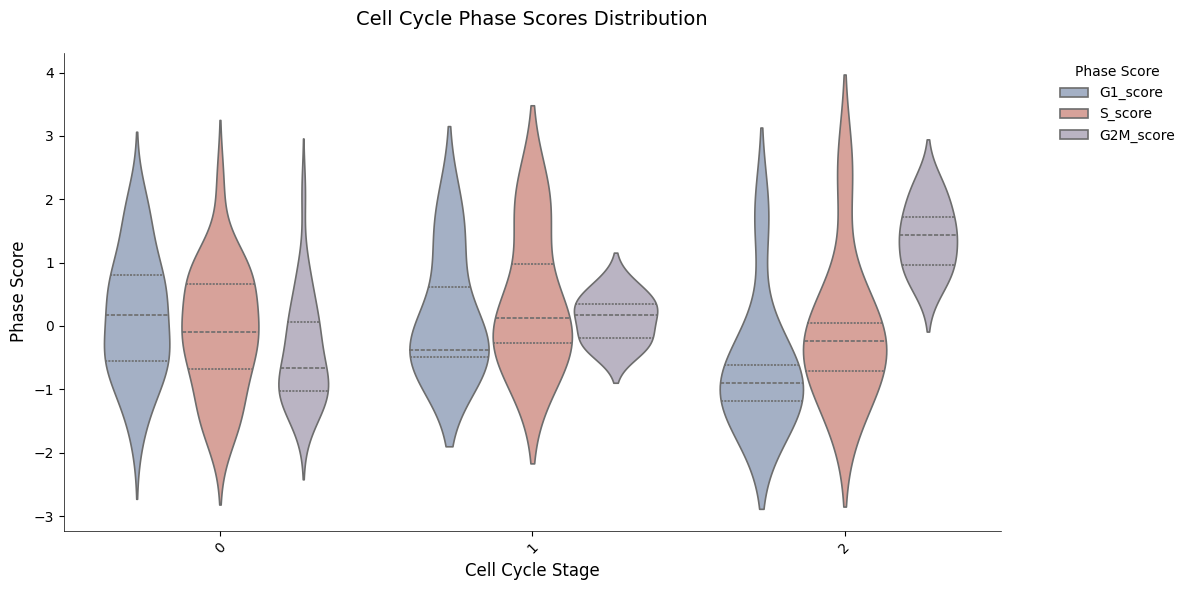

In [8]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ==============================
# Load CycleBase gene list
# ==============================
cyclebase = pd.read_table('./Dataset/CyclebaseGeneList.txt')

# Extract genes by peak time
g1_genes = cyclebase[cyclebase['Peaktime'].str.contains('G1')].Genename.values
g2_genes = cyclebase[cyclebase['Peaktime'].str.contains('G2')].Genename.values
m_genes  = cyclebase[cyclebase['Peaktime'].str.contains('M')].Genename.values
s_genes  = cyclebase[cyclebase['Peaktime'].str.contains('S')].Genename.values

# Combine and deduplicate
g2m_genes = np.unique(np.concatenate([g2_genes, m_genes]))
g1_genes  = np.unique(g1_genes)
m_genes   = np.unique(m_genes)

# ==============================
# Load dataset
# ==============================
adata1 = sc.read_h5ad('./Dataset/mESCQ.h5ad')

# Preprocessing
sc.pp.normalize_total(adata1, target_sum=1e4)
sc.pp.log1p(adata1)
sc.pp.scale(adata1, max_value=10)

# Ensure genes exist in dataset
s_genes_list   = [gene for gene in s_genes if gene in adata1.var_names]
g2m_genes_list = [gene for gene in g2m_genes if gene in adata1.var_names]
g1_genes_list  = [gene for gene in g1_genes if gene in adata1.var_names]

# ==============================
# Convert stage to string
# ==============================
adata1.obs['stage'] = adata1.obs['stage'].astype('str')

# ==============================
# Compute cell cycle scores
# First pass: G1 vs G2M
# ==============================
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=g1_genes_list,
    g2m_genes=g2m_genes_list
)

# Store G1 score separately
adata1.obs['G1_score'] = adata1.obs['S_score']

# Second pass: S vs G2M
sc.tl.score_genes_cell_cycle(
    adata1,
    s_genes=s_genes_list,
    g2m_genes=g2m_genes_list
)

# ==============================
# Scale scores
# ==============================
cols_to_scale = ['G1_score', 'S_score', 'G2M_score']
data_to_scale = adata1.obs[cols_to_scale]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Replace scaled values
adata1.obs[cols_to_scale] = scaled_data
adata1.obs['phase'] = adata1.obs['stage'].values

# ==============================
# Prepare data for plotting
# ==============================
plot_data = adata1.obs[['phase', 'G1_score', 'S_score', 'G2M_score']].melt(
    id_vars='phase',
    var_name='Phase',
    value_name='Score'
)

# Define color palette
phase_colors = {
    'G1_score': '#9FAFCB',  # soft blue-gray
    'S_score':  '#E19A90',  # coral pink
    'G2M_score':'#B9B1C5'   # light purple
}

# ==============================
# Plot violin distribution
# ==============================
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=plot_data,
    x='phase',
    y='Score',
    hue='Phase',
    palette=phase_colors,
    order=['0', '1', '2'],
    split=False,
    inner='quartile',
    linewidth=1.2
)

# Beautify plot
plt.title('Cell Cycle Phase Scores Distribution', fontsize=14, pad=20, fontweight='medium')
plt.xlabel('Cell Cycle Stage', fontsize=12, fontweight='medium')
plt.ylabel('Phase Score', fontsize=12, fontweight='medium')

# Legend
plt.legend(title='Phase Score', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Axis style
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

plt.xticks(rotation=45)
plt.tight_layout()

# ==============================
# Ensure output folder exists
# ==============================
output_dir = '/root/Cycle/Github/FigurePlot/Stage_Anno'
os.makedirs(output_dir, exist_ok=True)

# Save figure
plt.savefig(os.path.join(output_dir, 'mESCQ_Stage_Gene_Marker_Cyclebase.png'),
            bbox_inches='tight', dpi=300, transparent=True)
plt.show()
